<a href="https://colab.research.google.com/github/anmolrwt-77/Delivery-Time-Prediction/blob/main/LR_Delivery_Time_Prediction_Anmol_Singh_Rawat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/sample_data/porter_data_1.csv')

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])



In [ ]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')



In [ ]:
# Calculate time taken in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [ ]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

In [ ]:
# Define target variable (y) and features (X)
y = df['delivery_duration']
X = df.drop(columns=['delivery_duration'])
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()


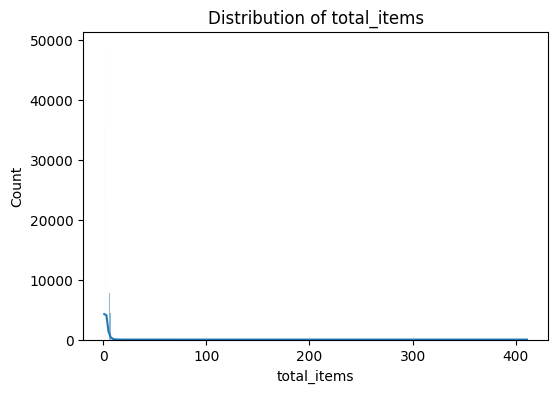

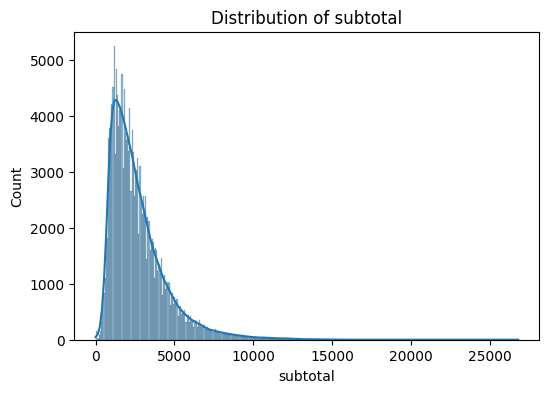

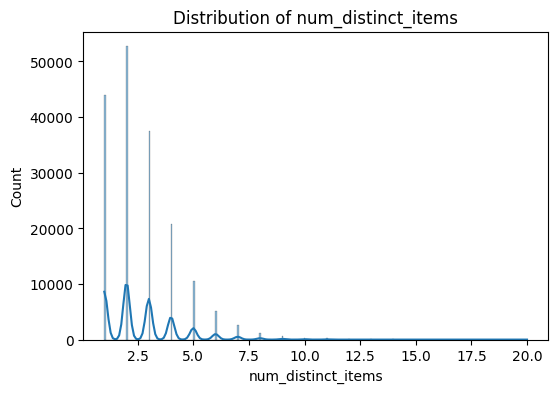

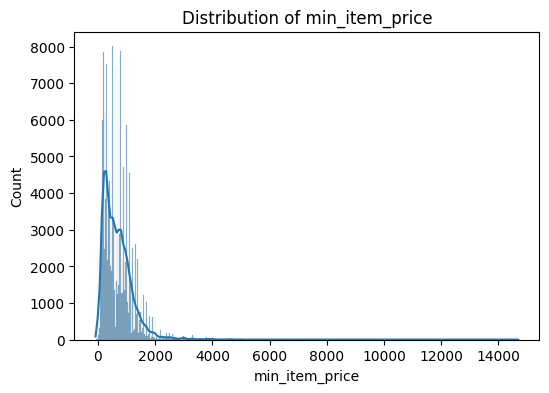

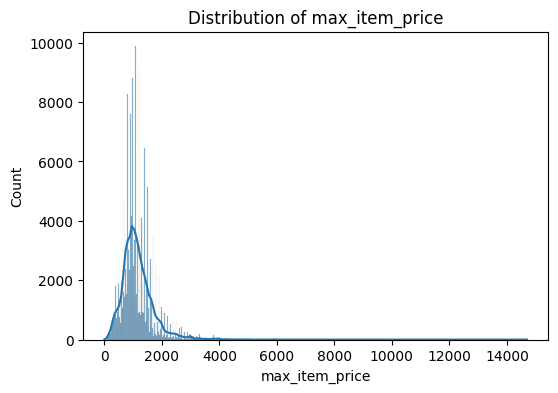

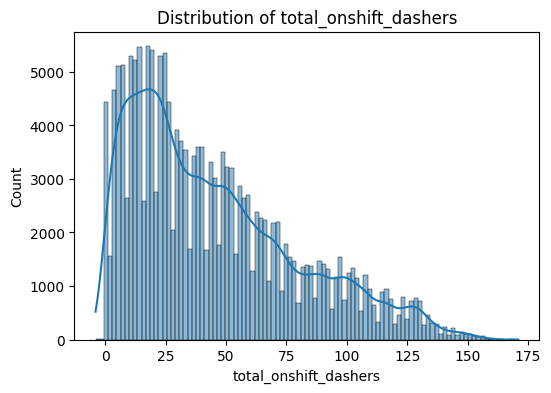

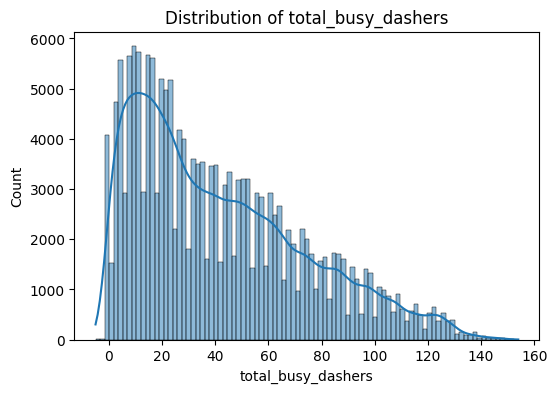

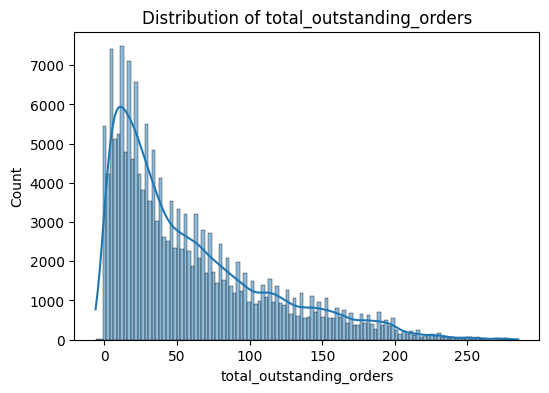

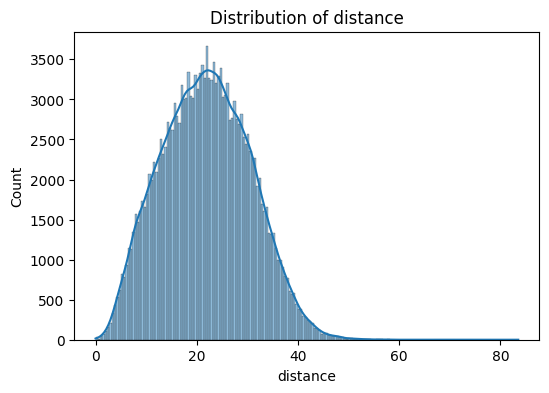

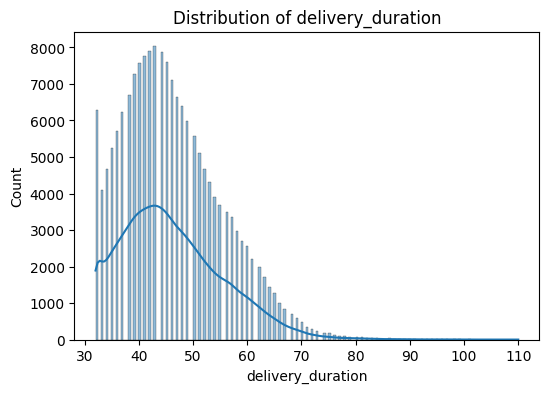

In [ ]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


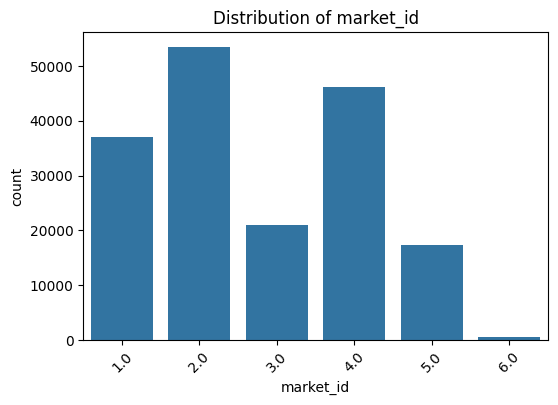

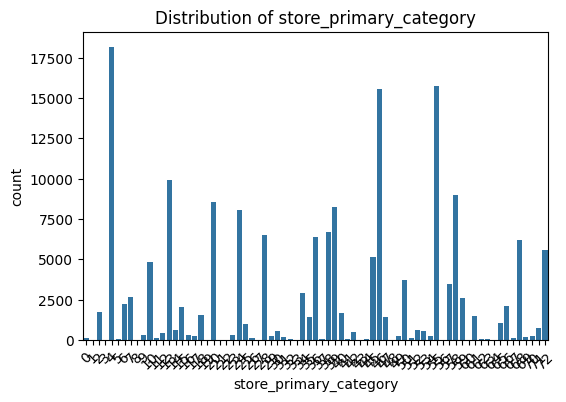

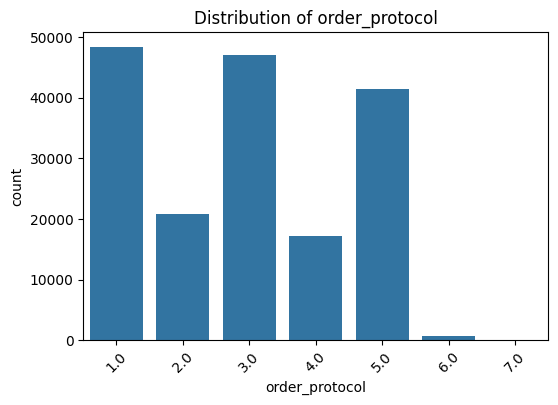

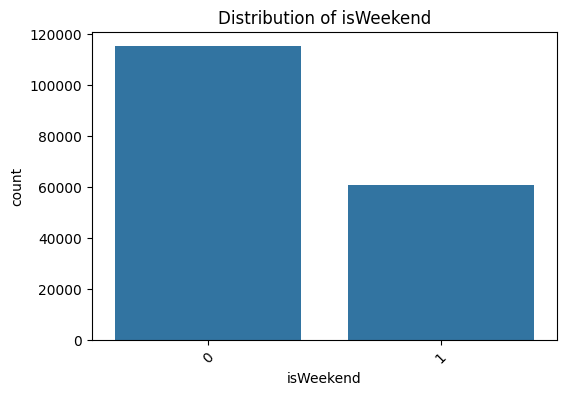

In [ ]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


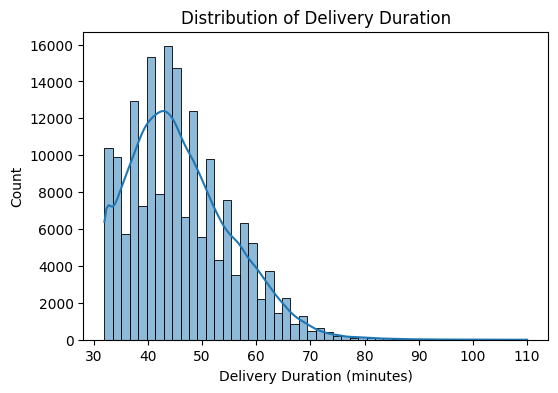

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.show()


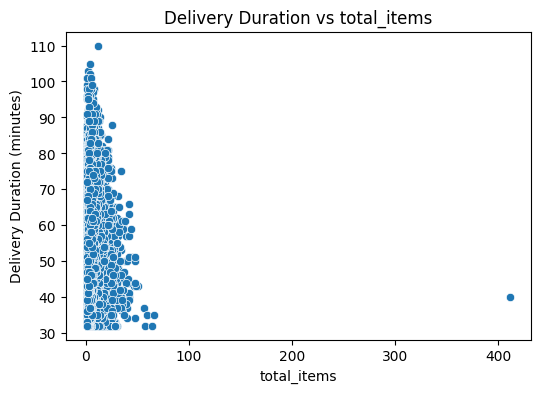

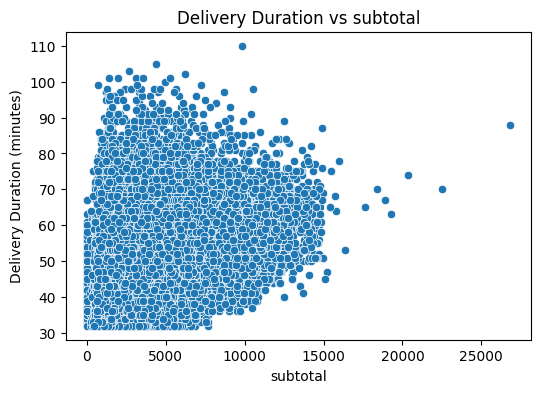

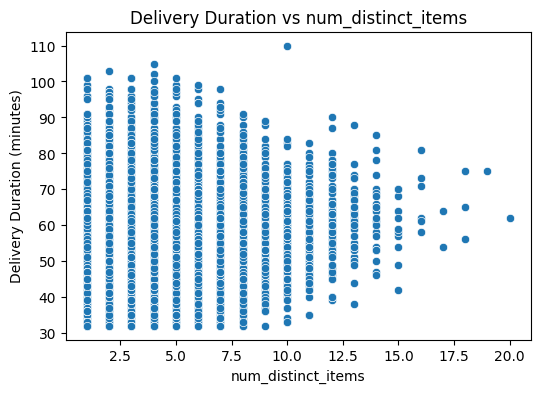

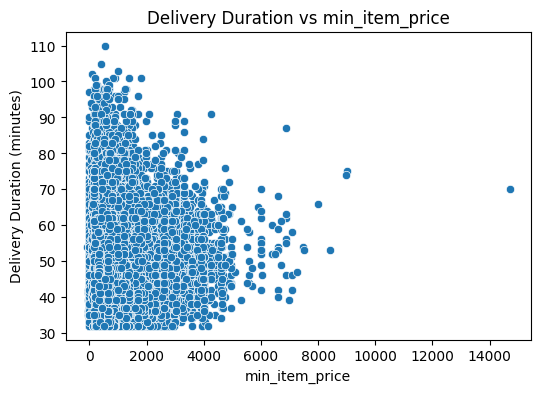

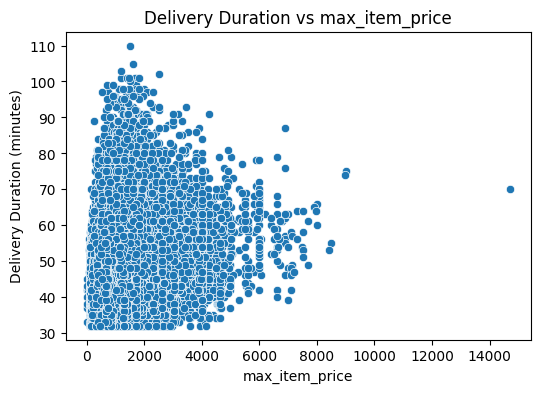

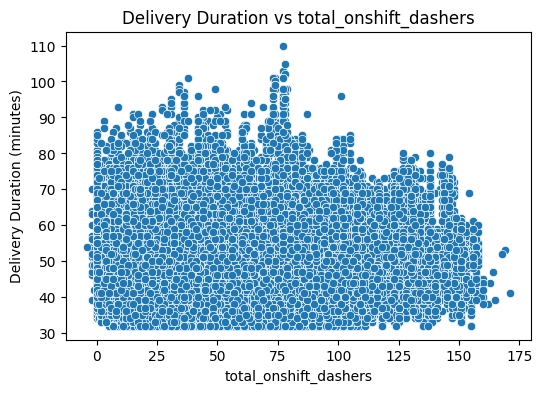

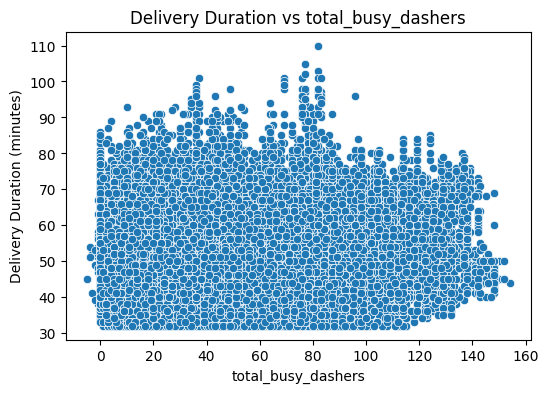

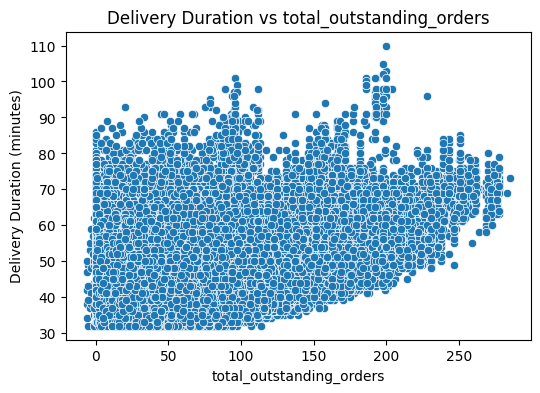

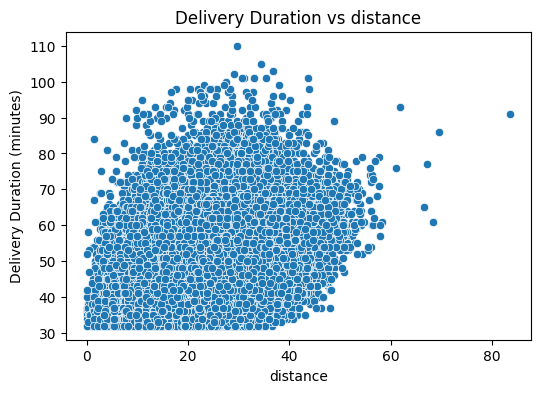

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    if col != 'delivery_duration':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['delivery_duration'])
        plt.title(f'Delivery Duration vs {col}')
        plt.xlabel(col)
        plt.ylabel('Delivery Duration (minutes)')
        plt.show()


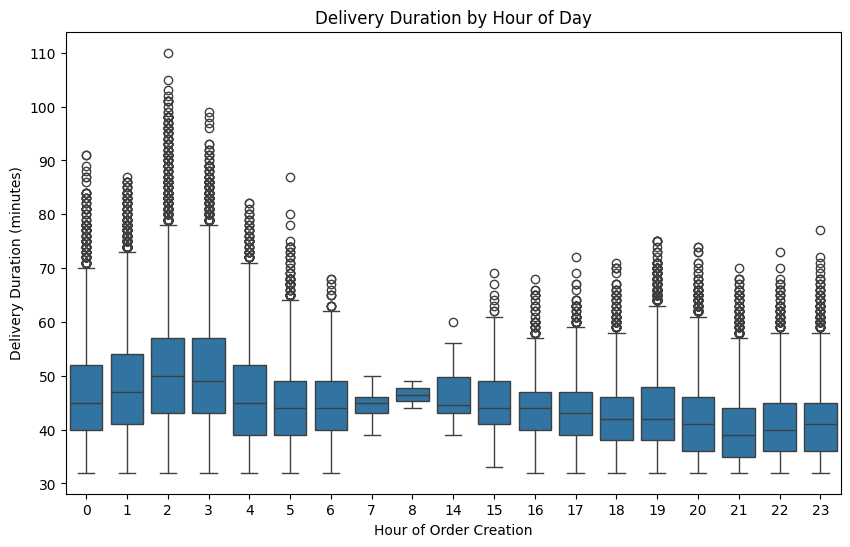

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='created_hour', y='delivery_duration')
plt.title('Delivery Duration by Hour of Day')
plt.xlabel('Hour of Order Creation')
plt.ylabel('Delivery Duration (minutes)')
plt.show()

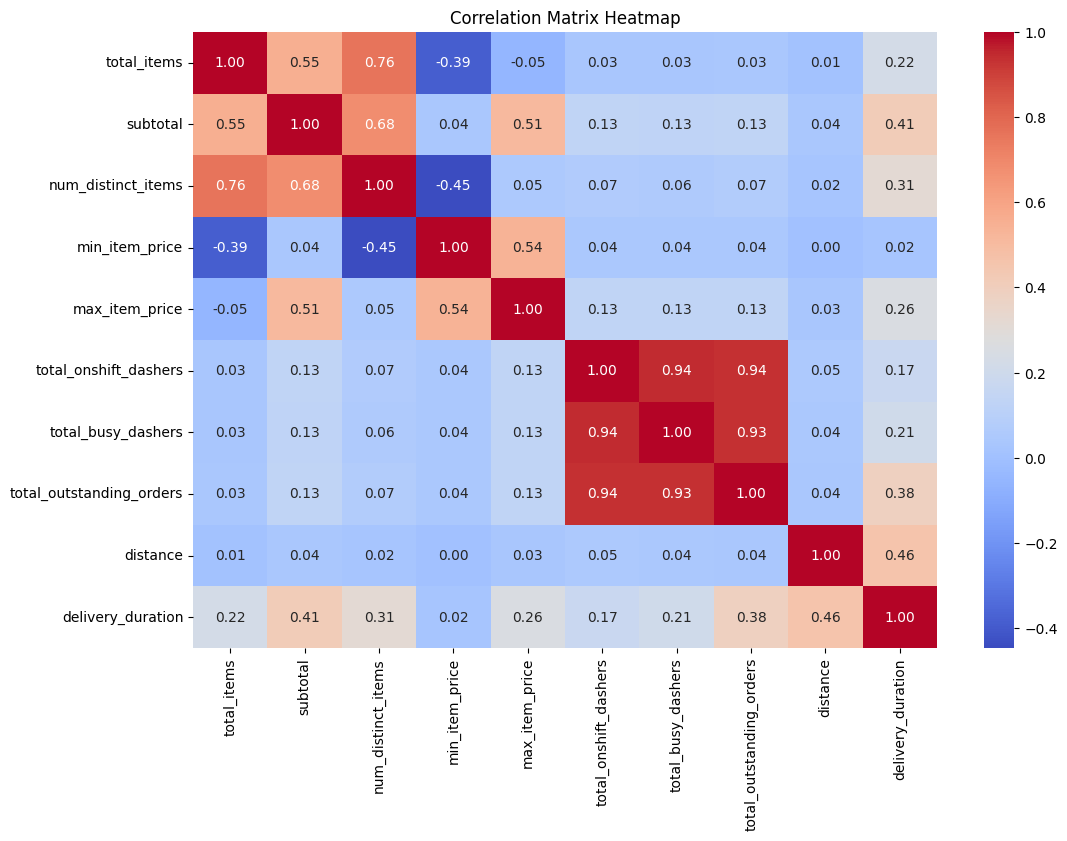

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
correlation_with_target = corr_matrix['delivery_duration'].abs().sort_values()
weak_features = correlation_with_target[correlation_with_target < 0.1].index.tolist()
drop_columns = weak_features[:5]  # select up to 5
X_train.drop(columns=[col for col in drop_columns if col in X_train.columns], inplace=True)
X_test.drop(columns=[col for col in drop_columns if col in X_test.columns], inplace=True)


# **Handeling Outliers**

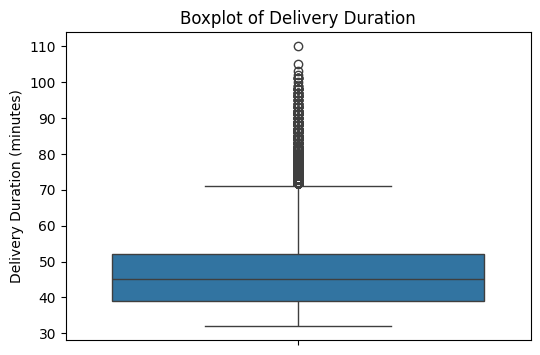

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['delivery_duration'])
plt.title('Boxplot of Delivery Duration')
plt.ylabel('Delivery Duration (minutes)')
plt.show()


In [ ]:
# Handle outliers
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['delivery_duration'] >= lower_bound) & (df['delivery_duration'] <= upper_bound)]

# Re-define y and X after outlier removal
y = df['delivery_duration']
X = df.drop(columns=['delivery_duration'])

# One-hot encode again
X = pd.get_dummies(X, drop_first=True)

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()


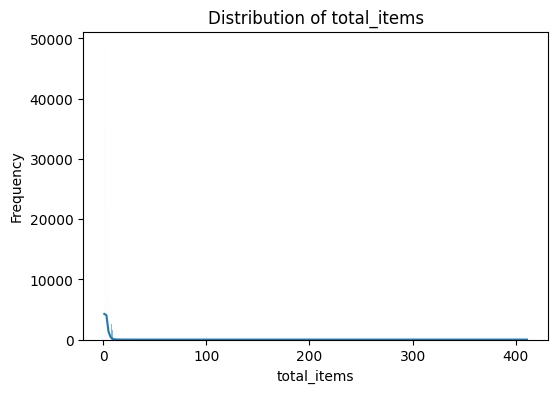

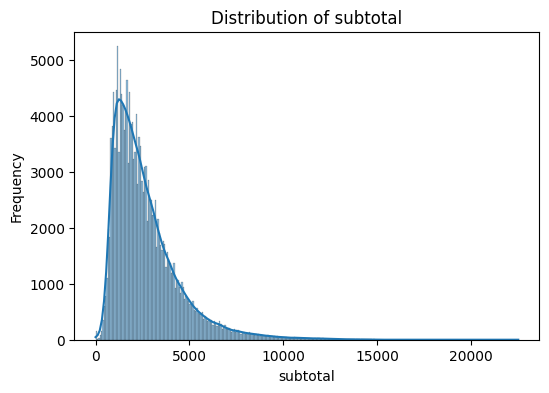

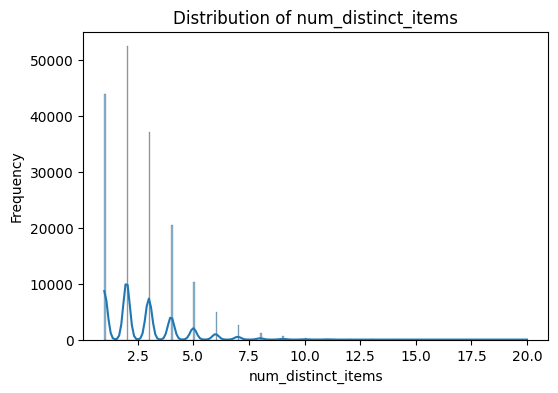

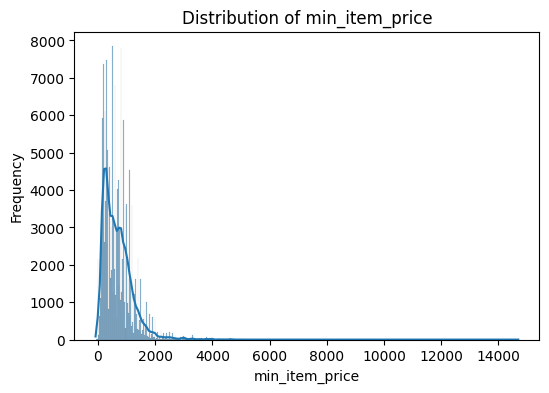

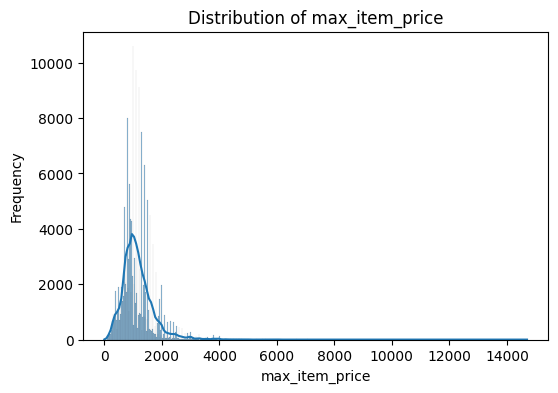

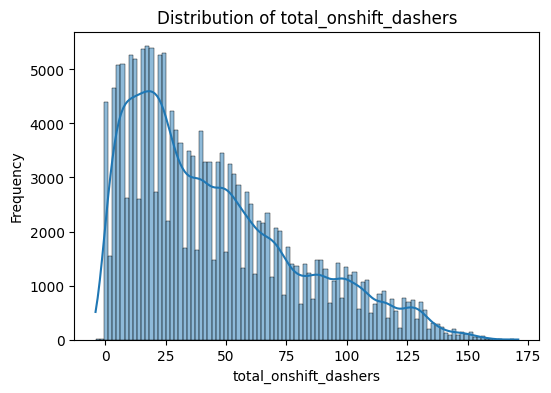

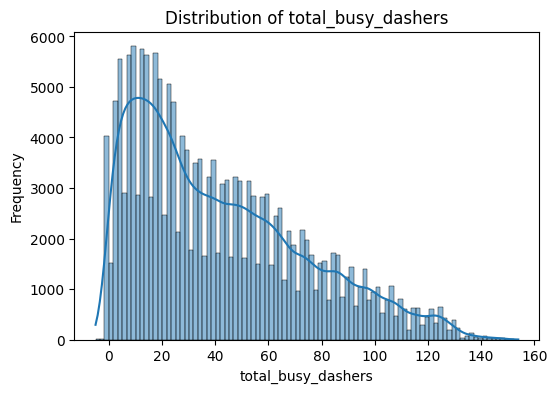

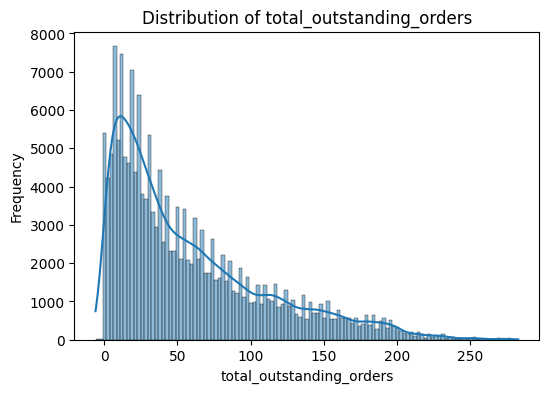

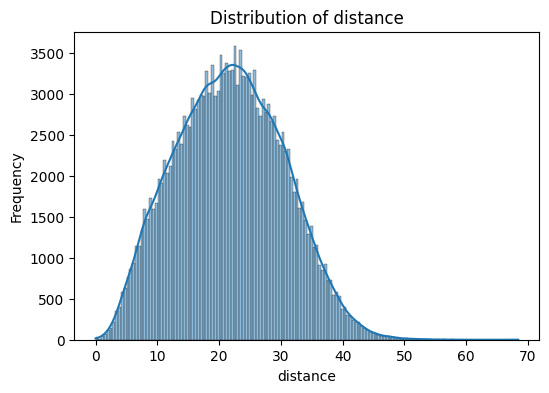

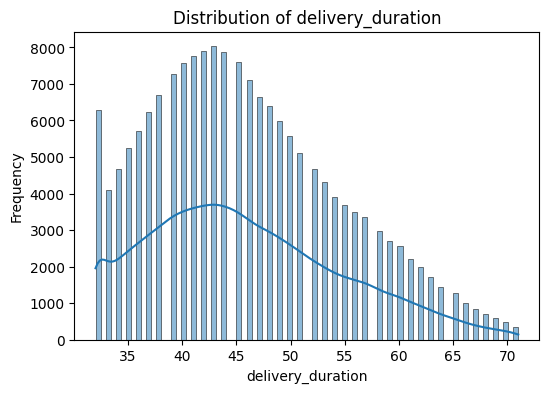

In [ ]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


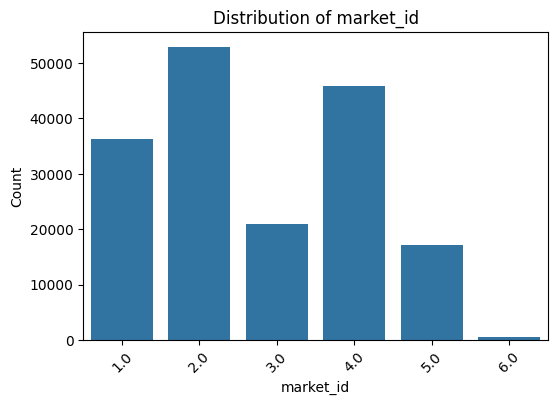

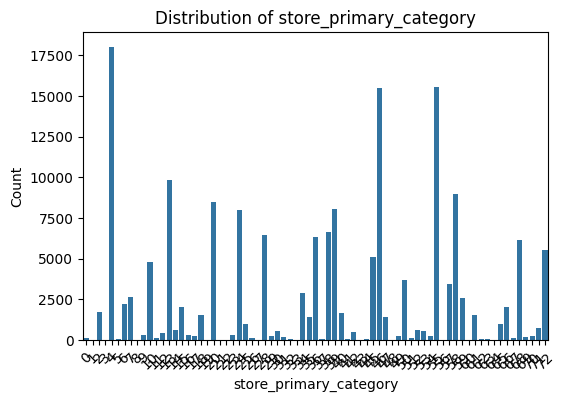

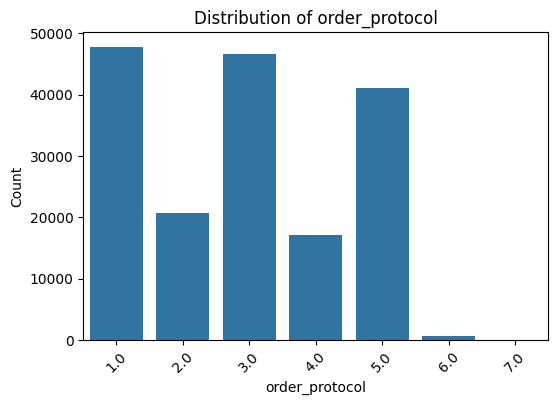

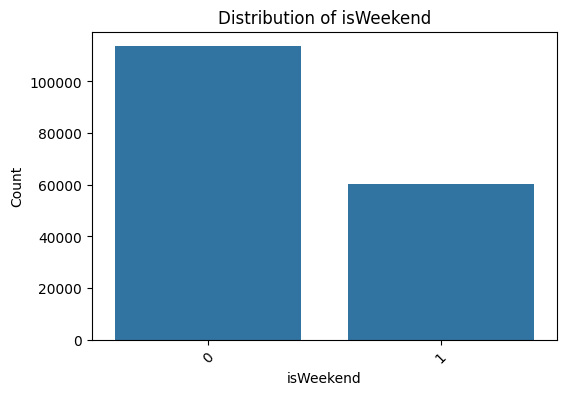

In [ ]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


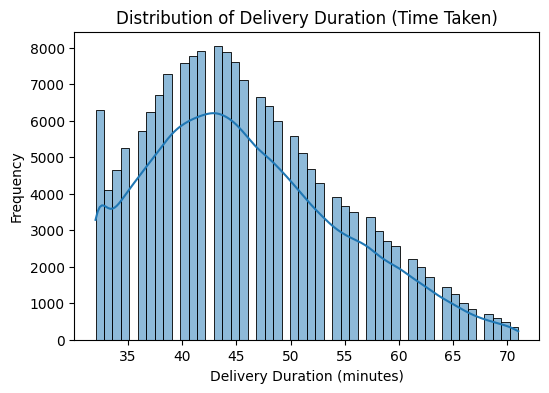

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration (Time Taken)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


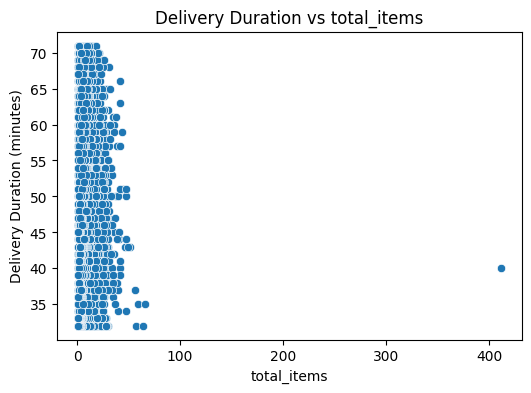

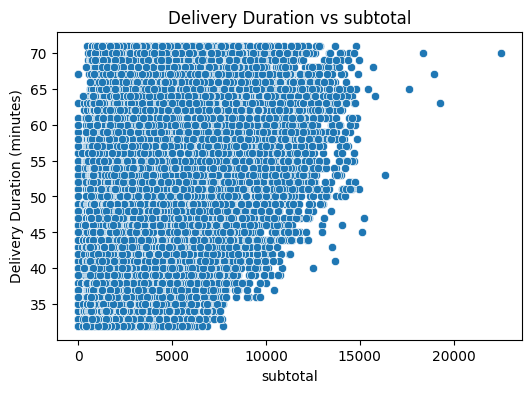

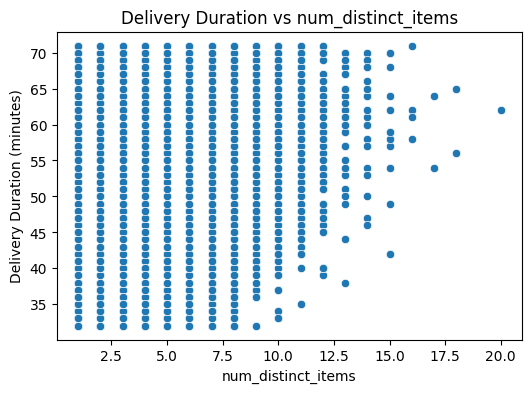

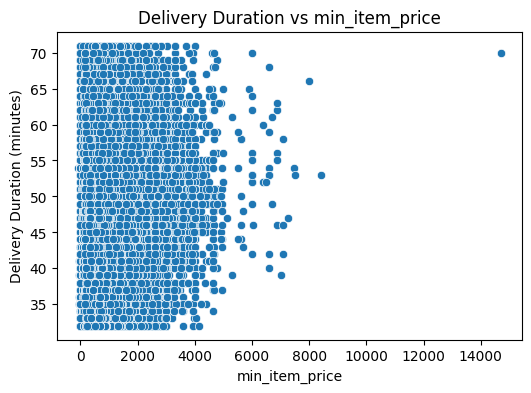

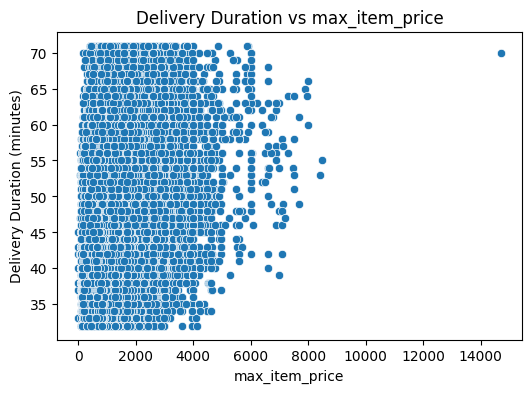

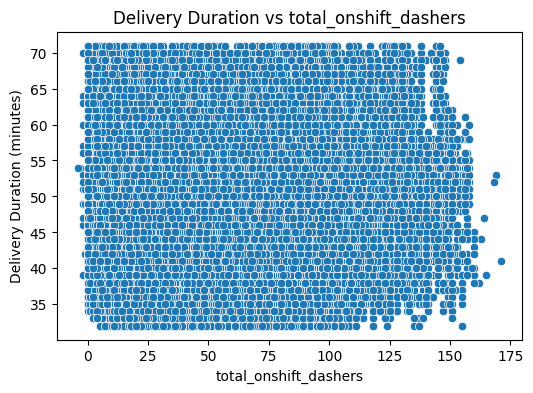

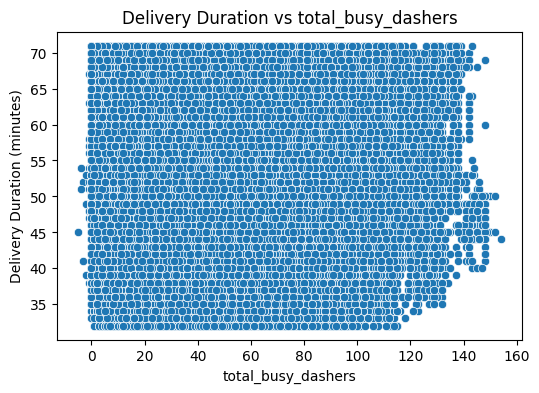

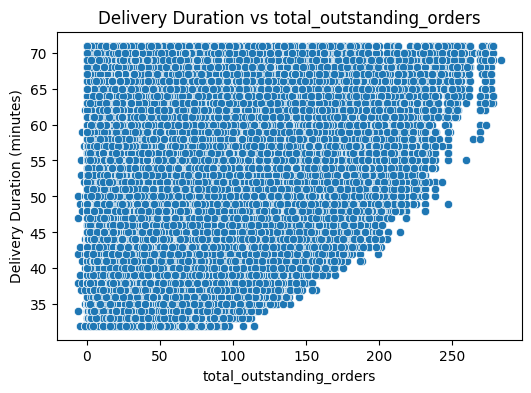

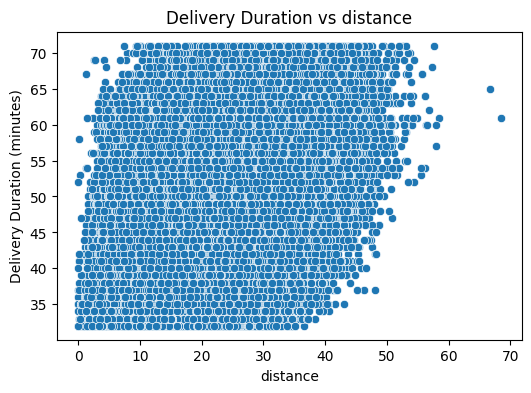

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    if col != 'delivery_duration':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['delivery_duration'])
        plt.title(f'Delivery Duration vs {col}')
        plt.xlabel(col)
        plt.ylabel('Delivery Duration (minutes)')
        plt.show()


In [ ]:
# Drop the weakly correlated columns from training dataset
corr_matrix = df[numerical_cols].corr()
correlation_with_target = corr_matrix['delivery_duration'].abs().sort_values()
weak_features = correlation_with_target[correlation_with_target < 0.1].index.tolist()
X_train.drop(columns=[col for col in weak_features if col in X_train.columns], inplace=True)
X_test.drop(columns=[col for col in weak_features if col in X_test.columns], inplace=True)

In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
# Create/Initialise the model
lr_model = LinearRegression()


In [ ]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [ ]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Absolute Error (MAE): 1.90
Mean Squared Error (MSE): 7.17
Root Mean Squared Error (RMSE): 2.68
R-squared (R² Score): 0.91


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use RFE only once to rank all features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

ranking = rfe.ranking_

# Zip with column names and sort by ranking
feature_ranks = sorted(zip(X_train.columns, ranking), key=lambda x: x[1])

# Print all ranked features
for feature, rank in feature_ranks:
    print(f"{feature}: Rank {rank}")


total_outstanding_orders: Rank 1
total_onshift_dashers: Rank 2
store_primary_category_3: Rank 3
total_busy_dashers: Rank 4
distance: Rank 5
store_primary_category_21: Rank 6
subtotal: Rank 7
store_primary_category_1: Rank 8
market_id_2.0: Rank 9
market_id_4.0: Rank 10
market_id_3.0: Rank 11
market_id_6.0: Rank 12
market_id_5.0: Rank 13
store_primary_category_43: Rank 14
store_primary_category_62: Rank 15
store_primary_category_8: Rank 16
order_protocol_5.0: Rank 17
store_primary_category_67: Rank 18
order_protocol_7.0: Rank 19
store_primary_category_63: Rank 20
store_primary_category_19: Rank 21
order_protocol_4.0: Rank 22
order_protocol_6.0: Rank 23
store_primary_category_51: Rank 24
order_protocol_3.0: Rank 25
isWeekend_1: Rank 26
store_primary_category_41: Rank 27
store_primary_category_10: Rank 28
store_primary_category_5: Rank 29
order_protocol_2.0: Rank 30
store_primary_category_33: Rank 31
store_primary_category_66: Rank 32
store_primary_category_27: Rank 33
store_primary_catego

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import math

start_time = time.time()

lr_model = LinearRegression()
selected_features = 56

final_rfe = RFE(estimator=lr_model, n_features_to_select=selected_features)
final_rfe.fit(X_train, y_train)

y_pred_final = final_rfe.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_final)))
print("R² Score:", r2_score(y_test, y_pred_final))

print("Execution Time:", time.time() - start_time, "seconds")


MAE: 1.8977601262442687
RMSE: 2.68038295044379
R² Score: 0.9074313834169312
Execution Time: 38.038273096084595 seconds


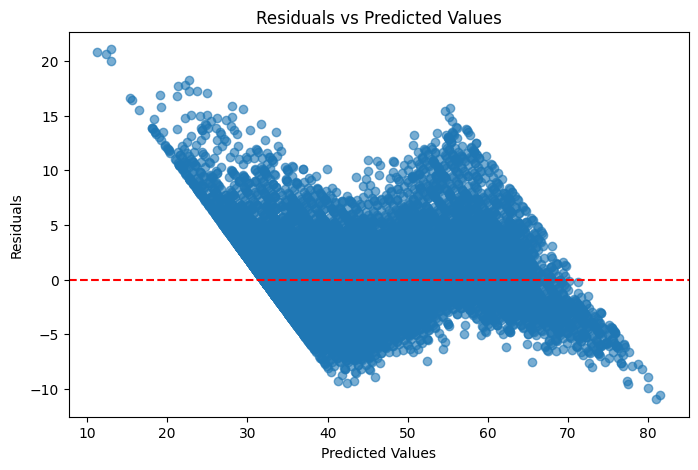

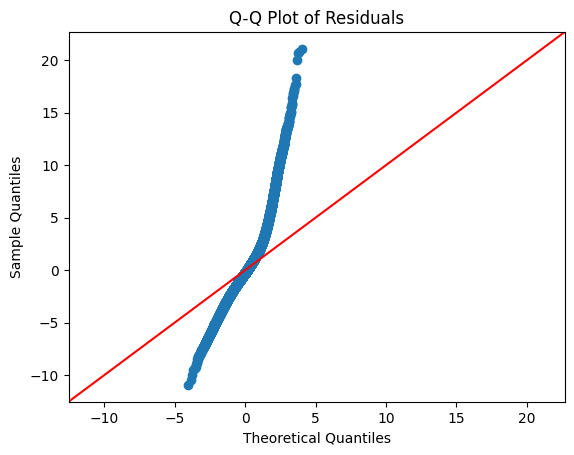

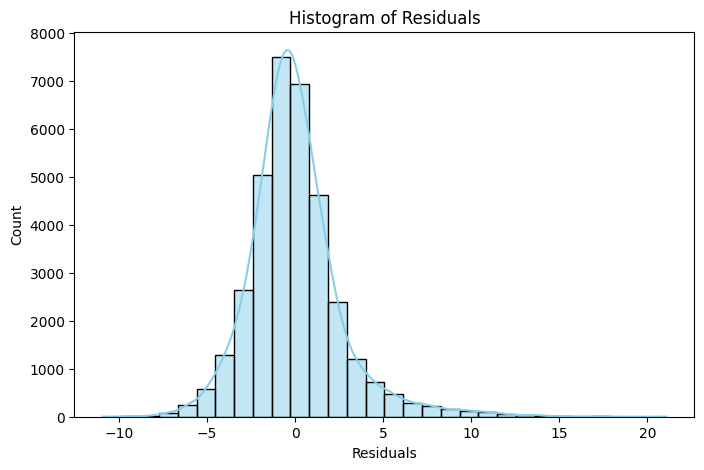

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import statsmodels.api as sm
residuals = y_test - y_pred_final

# 1. Residuals vs Predicted Values plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred_final, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 2. Q-Q Plot of Residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


In [ ]:
# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Get mask of selected features from RFE
selected_mask = final_rfe.support_

# Get names of selected features
selected_feature_names = feature_names[selected_mask]

# Get scaled and unscaled coefficients
scaled_coefs = final_rfe.estimator_.coef_
unscaled_coefs = scaled_coefs * X_train.std()[selected_mask]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Scaled Coefficient': scaled_coefs,
    'Unscaled Coefficient': unscaled_coefs
})

# Sort by absolute unscaled effect
comparison_df['|Unscaled|'] = comparison_df['Unscaled Coefficient'].abs()
comparison_df = comparison_df.sort_values(by='|Unscaled|', ascending=False)

comparison_df = comparison_df.drop(columns='|Unscaled|')  # Optional
display(comparison_df.head(10))  # Show top 10 influential features


,Feature,Scaled Coefficient,Unscaled Coefficient
total_outstanding_orders,total_outstanding_orders,17.310927,17.310989
total_onshift_dashers,total_onshift_dashers,-11.432506,-11.432547
distance,distance,4.178114,4.178129
total_busy_dashers,total_busy_dashers,-4.171722,-4.171737
subtotal,subtotal,2.170863,2.170871
market_id_2.0,market_id_2.0,-4.463928,-2.054081
created_hour,created_hour,-0.215939,-1.877231
market_id_4.0,market_id_4.0,-3.535624,-1.557981
market_id_3.0,market_id_3.0,-4.011486,-1.306857
order_protocol_5.0,order_protocol_5.0,-2.736614,-1.163173


In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Find the effect of 1 unit change in 'total_items'
# Check if 'total_items' is in the selected features
if 'total_items' in comparison_df['Feature'].values:
    effect = comparison_df[comparison_df['Feature'] == 'total_items']['Unscaled Coefficient'].values[0]
    print(f"Effect of 1 additional item on delivery time: {effect:.2f} minutes")
else:
    print("'total_items' was not selected as one of the important features.")


'total_items' was not selected as one of the important features.
